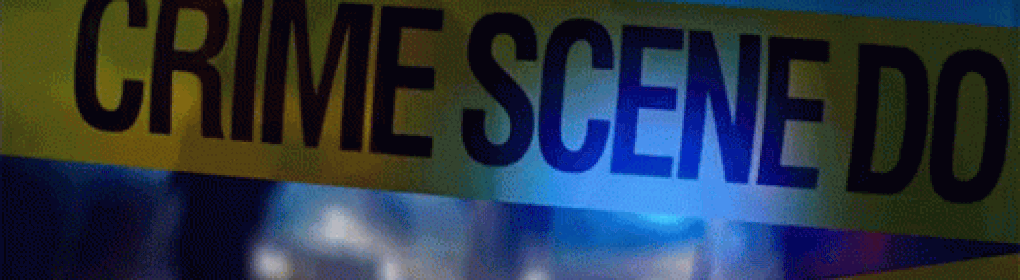

 # **Data Driven Sheild Against Crime**:🚨🕵🏻

---

**Name** : Ali Firdouse S

**Title** : Data Driven Sheild Against Crime

**Date** : February 26, 2025

**Organization**: Entri elevate

---

### **1. Overview of Problem Statement:**  
Crime prediction and analysis play a crucial role in law enforcement and public safety. By analyzing historical crime data, patterns can be identified to aid in predicting future crime occurrences. The goal of this project is to explore crime trends, detect correlations between crime attributes, and build machine learning models to improve crime prediction accuracy.  

---

### **2. Objective:**  
The main objectives of this project are:  
1. **Data Loading & Exploration** – Load and preprocess crime data from 2020 to the present.  
2. **Data Cleaning & Feature Engineering** – Handle missing values, extract time-based features, and apply transformations to normalize data.  
3. **Exploratory Data Analysis (EDA)** – Identify crime patterns based on time, location, weapon usage, and victim demographics.  
4. **Predictive Modeling** – Train regression and classification models to forecast crime types based on historical trends.  
5. **Model Evaluation & Optimization** – Compare model performances using various metrics like accuracy, RMSE, and AUC-ROC.  

---

### **3. Data Description:**  
**Source:**  
- **Crime Data from 2020 to Present**  
- Published by the **City of Los Angeles**  
- Available at: (https://catalog.data.gov/dataset/crime-data-from-2020-to-present)  

**Features:**  
The dataset consists of **1,004,847 rows and 28 columns**, providing details about reported crimes, including:  
1. **DATE OCC & TIME OCC** – When the crime happened (date & time).  
2. **AREA NAME** – Location where the crime occurred (e.g., Wilshire, Southwest).  
3. **Crm Cd & Crm Cd Desc** – Crime codes and descriptions (e.g., burglary, theft).  
4. **Weapon Used Cd & Weapon Desc** – Details on the weapon used (if any).  
5. **Premis Cd & Premis Desc** – Crime scene location type (e.g., street, apartment).  
6. **Vict Age, Vict Sex, Vict Descent** – Demographics of the victim.  
7. **Status Desc** – Investigation status (e.g., arrest made, investigation ongoing).  
8. **Latitude & Longitude** – Crime location coordinates.  

**Target Variable:**  
-  Crime Type (`Crm Cd Desc`) – This is a **categorical variable** representing the type of crime committed.  



# **4. Data Collection**

In [ ]:
# Essential Libraries
import numpy as np   # Numerical Operations
import pandas as pd  # Handling Dataset efficiently
import matplotlib.pyplot as plt  # Plotting graph abd charts
import seaborn as sns  # More attractive and statistical visualization
import warnings        # Suppress warnings for cleaner output during execution
warnings.filterwarnings('ignore')

# Machine learning utilities
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # split data into train & test set ,Evaluate performance ,Help tune hyper parameter for the best model performance
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score # measures diff btw predicted and actual value, represent how well model fit ,measure proportion of corect prediction
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder # Standardize data ,Normalise data with fixed range , convert into numerical form, convert into Binary vectors

# Machine learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet # Predicts continuous values,Binary classification,Regularization techniques reducing overfitting
from sklearn.tree import DecisionTreeRegressor  # tree based model for regression task
from sklearn.tree import export_graphviz # Help visualize decision tree
from sklearn.ensemble import RandomForestRegressor   , GradientBoostingRegressor #Ensemble of decision tree for better accuracy  #Bossting algorithm improve prediction by training sequential
from sklearn.neighbors import KNeighborsClassifier   #Classification based on nearest neighbour

from lightgbm import LGBMRegressor  # High performance gradient boosting algorithmsfor speed and efficiency


In [ ]:
  crimes= pd.read_csv('/content/drive/MyDrive/Capstone Project/Crime_Data_from_2020_to_Present.csv')

In [ ]:
crimes.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   

    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Wilshire          784         1     510   
1     Central          182         1     330   
2   Southwest          356         1     480   
3    Van Nuys          964         1     343   
4  Hollenbeck          413         1     510   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                             BIKE - STOLEN  ...     IC   Invest Cont   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC   Invest Cont   
4                          VEHICLE - STOLEN  ...     IC   Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    510.0    998.0       NaN      NaN   
1    330.0    998.0       NaN      NaN   
2    480.0      NaN       NaN      NaN   
3    343.0      NaN       NaN      NaN   
4    510.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                          200 E  AVENUE 28          NaN  34.0820 -118.2130  

[5 rows x 28 columns]

## 5. **Dataset Overview**

In [ ]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
crimes.shape


(1004847, 28)

### **Note:**

The dataset consists of 1,004,847 rows and 28 columns, containing detailed information about crimes reported in a particular region

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

### **Note:**

•	Column Types: The dataset contains various types of data, including numerical, categorical, and datetime types.


In [ ]:
crimes.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151591
Vict Age                0
Vict Sex           144604
Vict Descent       144616
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677654
Weapon Desc        677654
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935717
Crm Cd 3          1002532
Crm Cd 4          1004783
LOCATION                0
Cross Street       850626
LAT                     0
LON                     0
dtype: int64


### **Note:**

•	Missing Data: Several columns have missing values, which need to be handled appropriately.




# 6. **Data Preprocessing**
Data preprocessing is crucial to ensure that the data is clean and ready for analysis.



In [ ]:
# Drop unnecessary columns
crimes.drop(['DR_NO', 'Date Rptd', 'Rpt Dist No' , 'Part 1-2', 'Mocodes', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LOCATION'], axis=1, inplace=True)
crimes.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0  03/01/2020 12:00:00 AM      2130     7    Wilshire     510   
1  02/08/2020 12:00:00 AM      1800     1     Central     330   
2  11/04/2020 12:00:00 AM      1700     3   Southwest     480   
3  03/10/2020 12:00:00 AM      2037     9    Van Nuys     343   
4  09/09/2020 12:00:00 AM       630     4  Hollenbeck     510   

                                Crm Cd Desc  Vict Age Vict Sex Vict Descent  \
0                          VEHICLE - STOLEN         0        M            O   
1                     BURGLARY FROM VEHICLE        47        M            O   
2                             BIKE - STOLEN        19        X            X   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M            O   
4                          VEHICLE - STOLEN         0      NaN          NaN   

   Premis Cd                                   Premis Desc  Weapon Used Cd  \
0      101.0                                        STREET             NaN   
1      128.0             BUS STOP/LAYOVER (ALSO QUERY 124)             NaN   
2      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             NaN   
3      405.0                                CLOTHING STORE             NaN   
4      101.0                                        STREET             NaN   

  Weapon Desc Status   Status Desc      LAT       LON  
0         NaN     AA  Adult Arrest  34.0375 -118.3506  
1         NaN     IC   Invest Cont  34.0444 -118.2628  
2         NaN     IC   Invest Cont  34.0210 -118.3002  
3         NaN     IC   Invest Cont  34.1576 -118.4387  
4         NaN     IC   Invest Cont  34.0820 -118.2130

### **Note :**

**•	Dropped Unnecessary Columns:**
	Columns like Date Rptd, Rpt Dist No, and Mocodes were removed as they didn't contribute to the analysis.

In [ ]:
# Drop rows contains missing values
crimes.dropna(axis=0, inplace=True)
crimes.reset_index(drop=True, inplace=True)
crimes.head()


DATE OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0  05/10/2020 12:00:00 AM      2200     1      Central     626   
1  12/02/2020 12:00:00 AM      2245    12  77th Street     210   
2  05/01/2020 12:00:00 AM      2330    12  77th Street     230   
3  01/18/2020 12:00:00 AM       940     1      Central     624   
4  11/15/2020 12:00:00 AM       310     2      Rampart     310   

                                      Crm Cd Desc  Vict Age Vict Sex  \
0               INTIMATE PARTNER - SIMPLE ASSAULT        30        F   
1                                         ROBBERY        21        M   
2  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        28        F   
3                        BATTERY - SIMPLE ASSAULT        42        M   
4                                        BURGLARY        36        M   

  Vict Descent  Premis Cd                                   Premis Desc  \
0            W      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
1            H      101.0                                        STREET   
2            B      501.0                        SINGLE FAMILY DWELLING   
3            A      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4            W      210.0                          RESTAURANT/FAST FOOD   

   Weapon Used Cd                                     Weapon Desc Status  \
0           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AA   
1           511.0                                   VERBAL THREAT     IC   
2           201.0        KNIFE WITH BLADE OVER 6 INCHES IN LENGTH     IC   
3           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AA   
4           500.0                     UNKNOWN WEAPON/OTHER WEAPON     IC   

    Status Desc      LAT       LON  
0  Adult Arrest  34.0618 -118.2424  
1   Invest Cont  33.9610 -118.2695  
2   Invest Cont  33.9654 -118.2739  
3  Adult Arrest  34.0639 -118.2295  
4   Invest Cont  34.0758 -118.2552

### **Note:**

**•	Handled Missing Data:**
	Dropped rows with missing values (dropna) to ensure that the dataset is clean for analysis.

  •	**Reset** the index to maintain continuity after removing rows.


In [ ]:
# Split 'DATE OCC' into year, month and day.
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['YEAR OCC'] = crimes['DATE OCC'].dt.year
crimes['MONTH OCC'] = crimes['DATE OCC'].dt.month
crimes['DAY OCC'] = crimes['DATE OCC'].dt.day
crimes.head()

DATE OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0 2020-05-10      2200     1      Central     626   
1 2020-12-02      2245    12  77th Street     210   
2 2020-05-01      2330    12  77th Street     230   
3 2020-01-18       940     1      Central     624   
4 2020-11-15       310     2      Rampart     310   

                                      Crm Cd Desc  Vict Age Vict Sex  \
0               INTIMATE PARTNER - SIMPLE ASSAULT        30        F   
1                                         ROBBERY        21        M   
2  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        28        F   
3                        BATTERY - SIMPLE ASSAULT        42        M   
4                                        BURGLARY        36        M   

  Vict Descent  Premis Cd                                   Premis Desc  \
0            W      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
1            H      101.0                                        STREET   
2            B      501.0                        SINGLE FAMILY DWELLING   
3            A      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4            W      210.0                          RESTAURANT/FAST FOOD   

   Weapon Used Cd                                     Weapon Desc Status  \
0           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AA   
1           511.0                                   VERBAL THREAT     IC   
2           201.0        KNIFE WITH BLADE OVER 6 INCHES IN LENGTH     IC   
3           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AA   
4           500.0                     UNKNOWN WEAPON/OTHER WEAPON     IC   

    Status Desc      LAT       LON  YEAR OCC  MONTH OCC  DAY OCC  
0  Adult Arrest  34.0618 -118.2424      2020          5       10  
1   Invest Cont  33.9610 -118.2695      2020         12        2  
2   Invest Cont  33.9654 -118.2739      2020          5        1  
3  Adult Arrest  34.0639 -118.2295      2020          1       18  
4   Invest Cont  34.0758 -118.2552      2020         11       15

 **•	Extracted Date Components:**
	Converted the DATE OCC (date of occurrence) column to a datetime format.
	Created new columns for year, month, and day of the crime occurrence, which will help in trend analysis.


In [ ]:
crimes.describe()

DATE OCC       TIME OCC           AREA  \
count                         326917  326917.000000  326917.000000   
mean   2022-03-12 16:55:44.643441664    1347.114717      10.559585   
min              2020-01-01 00:00:00       1.000000       1.000000   
25%              2021-02-17 00:00:00     900.000000       5.000000   
50%              2022-03-23 00:00:00    1430.000000      11.000000   
75%              2023-04-14 00:00:00    1910.000000      16.000000   
max              2024-12-30 00:00:00    2359.000000      21.000000   
std                              NaN     672.134683       6.208280   

              Crm Cd       Vict Age      Premis Cd  Weapon Used Cd  \
count  326917.000000  326917.000000  326917.000000   326917.000000   
mean      508.106700      34.453403     317.349040      364.014129   
min       110.000000      -4.000000     101.000000      101.000000   
25%       230.000000      23.000000     102.000000      311.000000   
50%       624.000000      33.000000     212.000000      400.000000   
75%       626.000000      46.000000     502.000000      400.000000   
max       956.000000      99.000000     971.000000      516.000000   
std       239.912081      17.975517     216.919878      123.678561   

                 LAT            LON       YEAR OCC      MONTH OCC  \
count  326917.000000  326917.000000  326917.000000  326917.000000   
mean       33.976026    -118.040395    2021.713594       6.307399   
min         0.000000    -118.667300    2020.000000       1.000000   
25%        33.997400    -118.404900    2021.000000       3.000000   
50%        34.050600    -118.305900    2022.000000       6.000000   
75%        34.129600    -118.270200    2023.000000       9.000000   
max        34.334300       0.000000    2024.000000      12.000000   
std         1.720779       5.966915       1.251961       3.437132   

             DAY OCC  
count  326917.000000  
mean       15.606971  
min         1.000000  
25%         8.000000  
50%        16.000000  
75%        23.000000  
max        31.000000  
std         8.876331

### **Note:**  

1. **Total Records (count)** – **326,917 crimes reported**.  
2. **Date Range** – Crime data spans from **January 1, 2020, to December 30, 2024**.  
3. **Crime Code Insights (`Crm Cd`)**  
   - **Mean Crime Code:** 508.1 (indicates the average severity/type of crime).  
   - **Range:** 110 (min) to 956 (max).  
4. **Victim Age (`Vict Age`)**  
   - **Mean Age:** 34.45 years.  
   - **Anomaly:** Minimum age is **-4** (requires data cleaning).  
   - **Max Age:** 99 years.  
5. **Time of Crime (`TIME OCC`)**  
   - **Peak Crime Time:** Median is **1430 (2:30 PM)**, with high variance.  
   - **Min:** 1 (likely represents **12:01 AM**), **Max:** 2359 (**11:59 PM**).  
6. **Geospatial Data (`LAT, LON`)**  
   - **Mean Latitude:** 33.97, **Longitude:** -118.04.  
   - **Anomaly:** Minimum **LAT = 0**, indicating **missing/inaccurate coordinates**.  
7. **Crime Frequency by Year (`YEAR OCC`)**  
   - **Average Year:** 2021.71 (data is mostly recent).  
   - **Max Year:** 2024 (indicating future data is included).  
8. **Standard Deviation (Variability in Data)**  
   - **Crime Location (`Premis Cd`)** – High variance (std = 216.9), suggesting **crimes occur in various types of locations**.  
   - **Weapons Used (`Weapon Used Cd`)** – Wide range (std = 123.67), indicating **diverse crime severity**.  

### **Key Takeaways**  
🔹 **Data needs cleaning** (fix negative victim ages, missing geolocations).  
🔹 **Most crimes occur in the afternoon (~2:30 PM).**  
🔹 **Crime locations and weapon usage are highly varied.**  
🔹 **Crime trends span multiple years (2020-2024).**

# **7. Data Structure After Preprocessing**

After preprocessing, the dataset was transformed into the following structure:

**•	crimes_desc DataFrame:** Contains descriptions of the crime, weapon used, status of the case, and premises involved.

**•	crimes DataFrame:** Contains the main structured data related to the crime, including:



In [ ]:
# Relocate columns
crimes_desc = crimes[['Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status Desc']]
crimes = crimes[['YEAR OCC', 'MONTH OCC', 'DAY OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status']]
crimes

YEAR OCC  MONTH OCC  DAY OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0           2020          5       10      2200     1      Central     626   
1           2020         12        2      2245    12  77th Street     210   
2           2020          5        1      2330    12  77th Street     230   
3           2020          1       18       940     1      Central     624   
4           2020         11       15       310     2      Rampart     310   
...          ...        ...      ...       ...   ...          ...     ...   
326912      2024          1       13       720    16     Foothill     230   
326913      2024          1       16      1510    20      Olympic     624   
326914      2024         10       16      1546    14      Pacific     341   
326915      2024          1       15       100     1      Central     745   
326916      2024          4       24      1500     3    Southwest     230   

        Vict Age Vict Sex Vict Descent  Premis Cd  Weapon Used Cd Status  
0             30        F            W      502.0           400.0     AA  
1             21        M            H      101.0           511.0     IC  
2             28        F            B      501.0           201.0     IC  
3             42        M            A      502.0           400.0     AA  
4             36        M            W      210.0           500.0     IC  
...          ...      ...          ...        ...             ...    ...  
326912        36        M            H      101.0           207.0     IC  
326913        80        F            O      124.0           400.0     IC  
326914        46        M            H      223.0           500.0     IC  
326915         0        X            X      503.0           500.0     IC  
326916        70        F            W      102.0           308.0     IC  

[326917 rows x 13 columns]

In [ ]:
crimes_desc.head()

Crm Cd Desc  \
0               INTIMATE PARTNER - SIMPLE ASSAULT   
1                                         ROBBERY   
2  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
3                        BATTERY - SIMPLE ASSAULT   
4                                        BURGLARY   

                                    Premis Desc  \
0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
1                                        STREET   
2                        SINGLE FAMILY DWELLING   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4                          RESTAURANT/FAST FOOD   

                                      Weapon Desc   Status Desc  
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Arrest  
1                                   VERBAL THREAT   Invest Cont  
2        KNIFE WITH BLADE OVER 6 INCHES IN LENGTH   Invest Cont  
3  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Arrest  
4                     UNKNOWN WEAPON/OTHER WEAPON   Invest Cont

# **8. Data Analysis and Exploration**







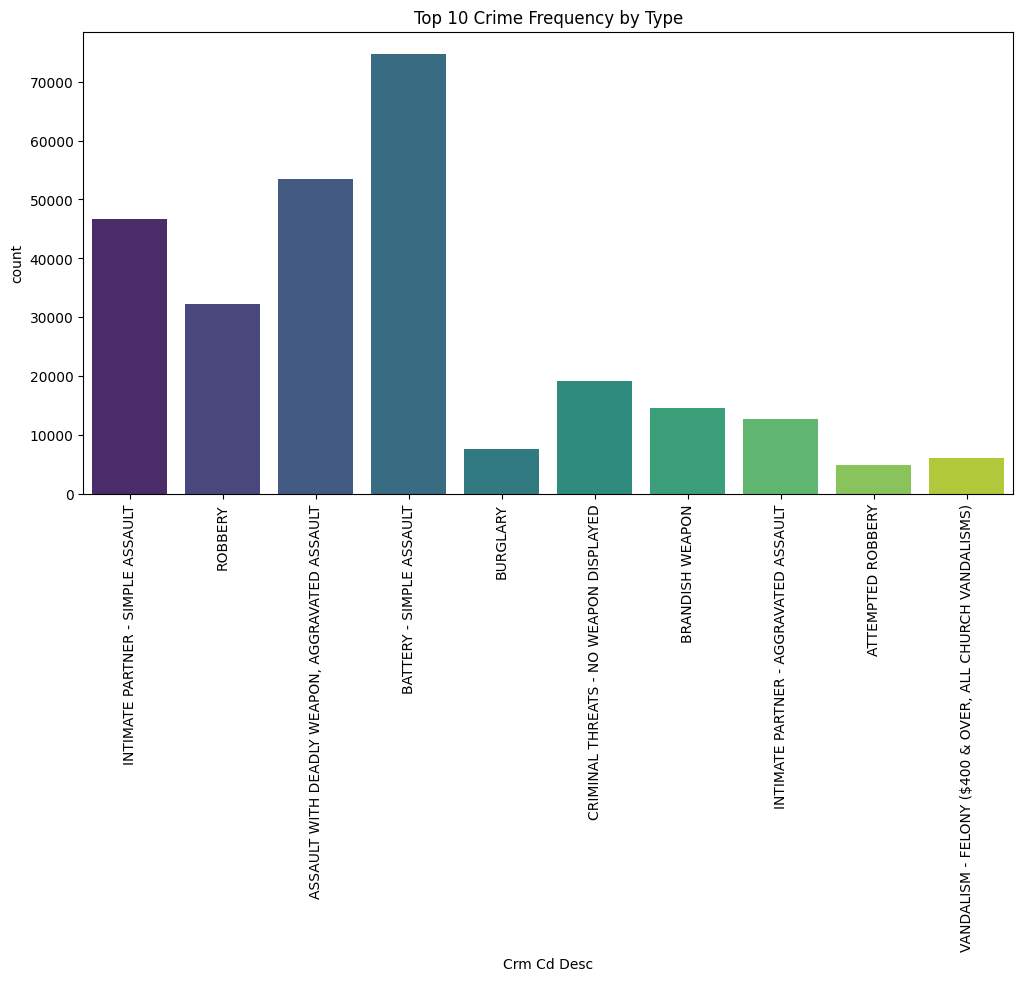

In [ ]:

# Crime Frequency by Type - Top 10
top_10_crimes = crimes_desc['Crm Cd Desc'].value_counts().head(10)

# Plot the top 10 crime types
plt.figure(figsize=(12,6))
sns.countplot(data=crimes_desc[crimes_desc['Crm Cd Desc'].isin(top_10_crimes.index)], x='Crm Cd Desc', palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 10 Crime Frequency by Type")
plt.show()





We identified the top 10 most frequent crime descriptions in the dataset.

**•	value_counts():** Counts the number of occurrences for each unique crime description.

**•	.head(10):** Displays the top 10 most frequent crime descriptions.

In [ ]:
crimes_desc['Crm Cd Desc'].value_counts().head(10)

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   74791
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             53483
INTIMATE PARTNER - SIMPLE ASSAULT                          46598
ROBBERY                                                    32218
CRIMINAL THREATS - NO WEAPON DISPLAYED                     19184
BRANDISH WEAPON                                            14524
INTIMATE PARTNER - AGGRAVATED ASSAULT                      12657
BURGLARY                                                    7586
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6042
ATTEMPTED ROBBERY                                           4827
Name: count, dtype: int64

### **Note:**
**Battery** is a criminal offense that involves harmful or offensive physical contact with another person without their consent.

**Robbery** is the action of taking property unlawfully from a person or place by force or threat of force.


**Aggravated assault** is a violent crime that involves the threat or use of violence to cause another person to fear immediate physical harm.

**Intimate partner violence**  is domestic violence by a current or former spouse or partner.

**Brandishing a weapon** is the crime of exhibiting something that could be used as a weapon in a threatening manner

In [ ]:
crimes_desc[crimes_desc['Crm Cd Desc']=="BATTERY - SIMPLE ASSAULT"]['Status Desc'].value_counts()

Status Desc
Invest Cont     49876
Adult Other     19324
Adult Arrest     4555
Juv Other         661
Juv Arrest        375
Name: count, dtype: int64

It filters the data for simple assault cases, selects their status column, and counts how many times each status appears.


 • Invest Cont (Investigation Continued)

 • Adult Arrest (arrest of an adult suspect)

 • Adult Other (no arrest was made,  non-arrest actions such as warnings)

 • Juv Other  (no arrest was made,  non-arrest actions such as warnings)

 • Juv Arrest (Juvenile Arrest)  

 • UNK (Unknown)

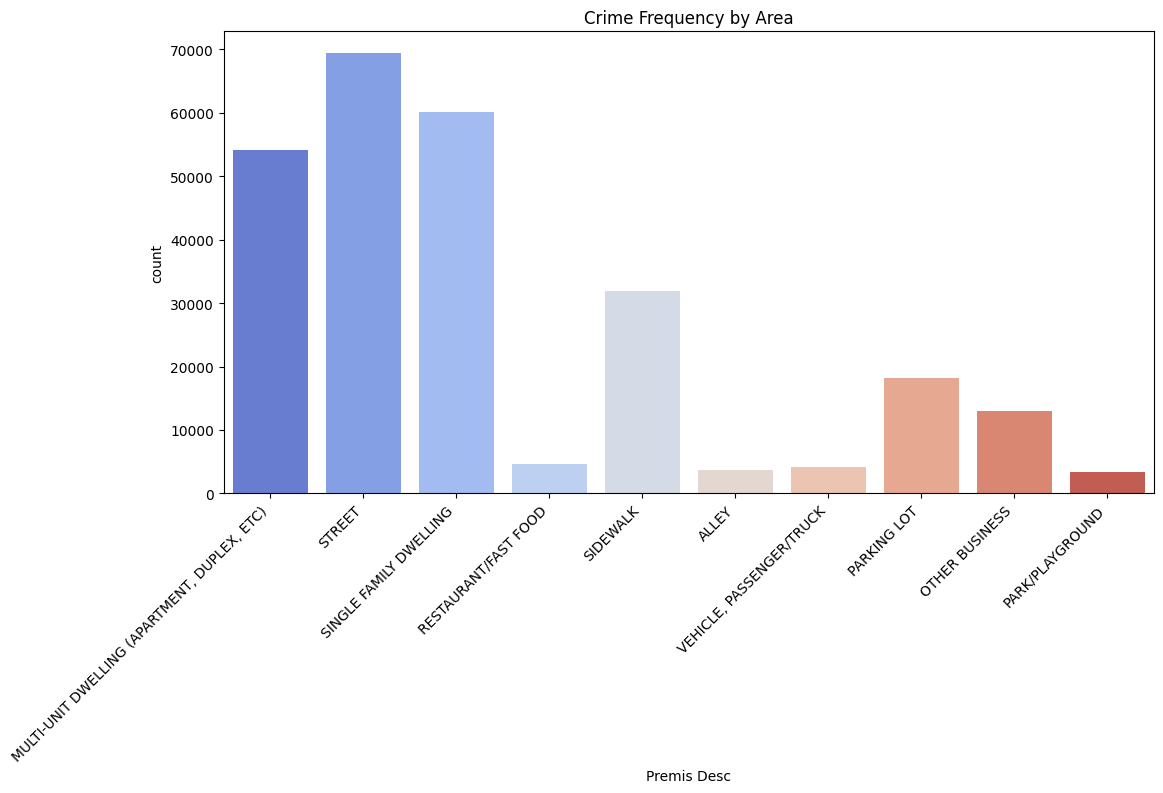

In [ ]:
# Crime Frequency by Type - Top 10
top_10_area = crimes_desc['Premis Desc'].value_counts().head(10)

# Crime Frequency by Area
plt.figure(figsize=(12,6))
sns.countplot(data=crimes_desc[crimes_desc['Premis Desc'].isin(top_10_area.index)], x='Premis Desc', palette='coolwarm')
plt.title("Crime Frequency by Area")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
crimes_desc['Premis Desc'].value_counts().head(10)


Premis Desc
STREET                                          69358
SINGLE FAMILY DWELLING                          60139
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    54176
SIDEWALK                                        31843
PARKING LOT                                     18226
OTHER BUSINESS                                  12936
RESTAURANT/FAST FOOD                             4625
VEHICLE, PASSENGER/TRUCK                         4200
ALLEY                                            3689
PARK/PLAYGROUND                                  3334
Name: count, dtype: int64

This shows the top 10 most common types of premises where crimes occurred, based on the Premis Description.
This gives a snapshot of the locations where crimes were most frequently reported.

In [ ]:
crimes_desc[crimes_desc['Premis Desc']=="STREET"]['Status Desc'].value_counts()

Status Desc
Invest Cont     47230
Adult Other     11300
Adult Arrest    10117
Juv Arrest        595
Juv Other         115
UNK                 1
Name: count, dtype: int64

It filters the data for street, selects their status column, and counts how many times each status appears.

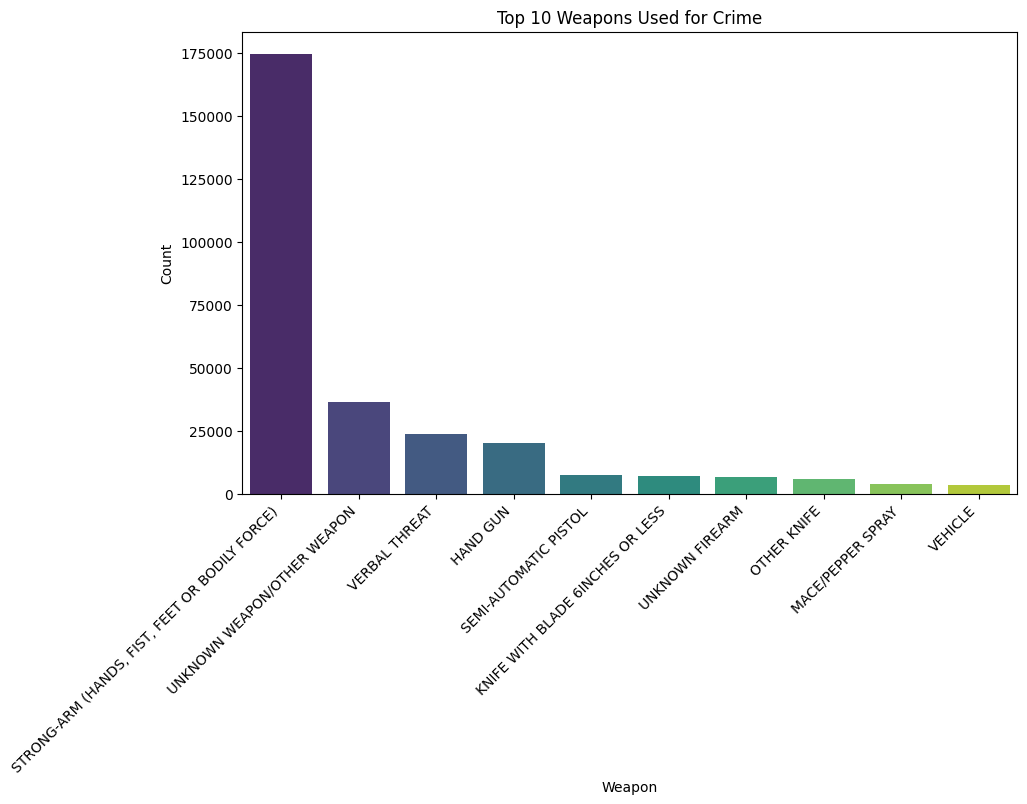

In [ ]:
#  Top 10 Weapons Used for Crime

weapon_counts = crimes_desc['Weapon Desc'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_counts.index, y=weapon_counts.values, palette='viridis')
plt.title('Top 10 Weapons Used for Crime')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
weapon_counts = crimes_desc['Weapon Desc'].value_counts().head(10)

weapon_counts

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174653
UNKNOWN WEAPON/OTHER WEAPON                        36343
VERBAL THREAT                                      23831
HAND GUN                                           20124
SEMI-AUTOMATIC PISTOL                               7238
KNIFE WITH BLADE 6INCHES OR LESS                    6833
UNKNOWN FIREARM                                     6574
OTHER KNIFE                                         5876
MACE/PEPPER SPRAY                                   3726
VEHICLE                                             3256
Name: count, dtype: int64

In [ ]:
# Extract data for plotting distribution
crimes_distribution = crimes.iloc[:, [1, 2, 3, 4, 6, 7, 10, 11]]
crimes_distribution

MONTH OCC  DAY OCC  TIME OCC  AREA  Crm Cd  Vict Age  Premis Cd  \
0               5       10      2200     1     626        30      502.0   
1              12        2      2245    12     210        21      101.0   
2               5        1      2330    12     230        28      501.0   
3               1       18       940     1     624        42      502.0   
4              11       15       310     2     310        36      210.0   
...           ...      ...       ...   ...     ...       ...        ...   
326912          1       13       720    16     230        36      101.0   
326913          1       16      1510    20     624        80      124.0   
326914         10       16      1546    14     341        46      223.0   
326915          1       15       100     1     745         0      503.0   
326916          4       24      1500     3     230        70      102.0   

        Weapon Used Cd  
0                400.0  
1                511.0  
2                201.0  
3                400.0  
4                500.0  
...                ...  
326912           207.0  
326913           400.0  
326914           500.0  
326915           500.0  
326916           308.0  

[326917 rows x 8 columns]

•	To focus on relevant data for analysis.

•	These columns might contain numeric values suitable for distribution plotting.

•	Non-relevant columns (e.g., text descriptions, categorical IDs) are excluded.


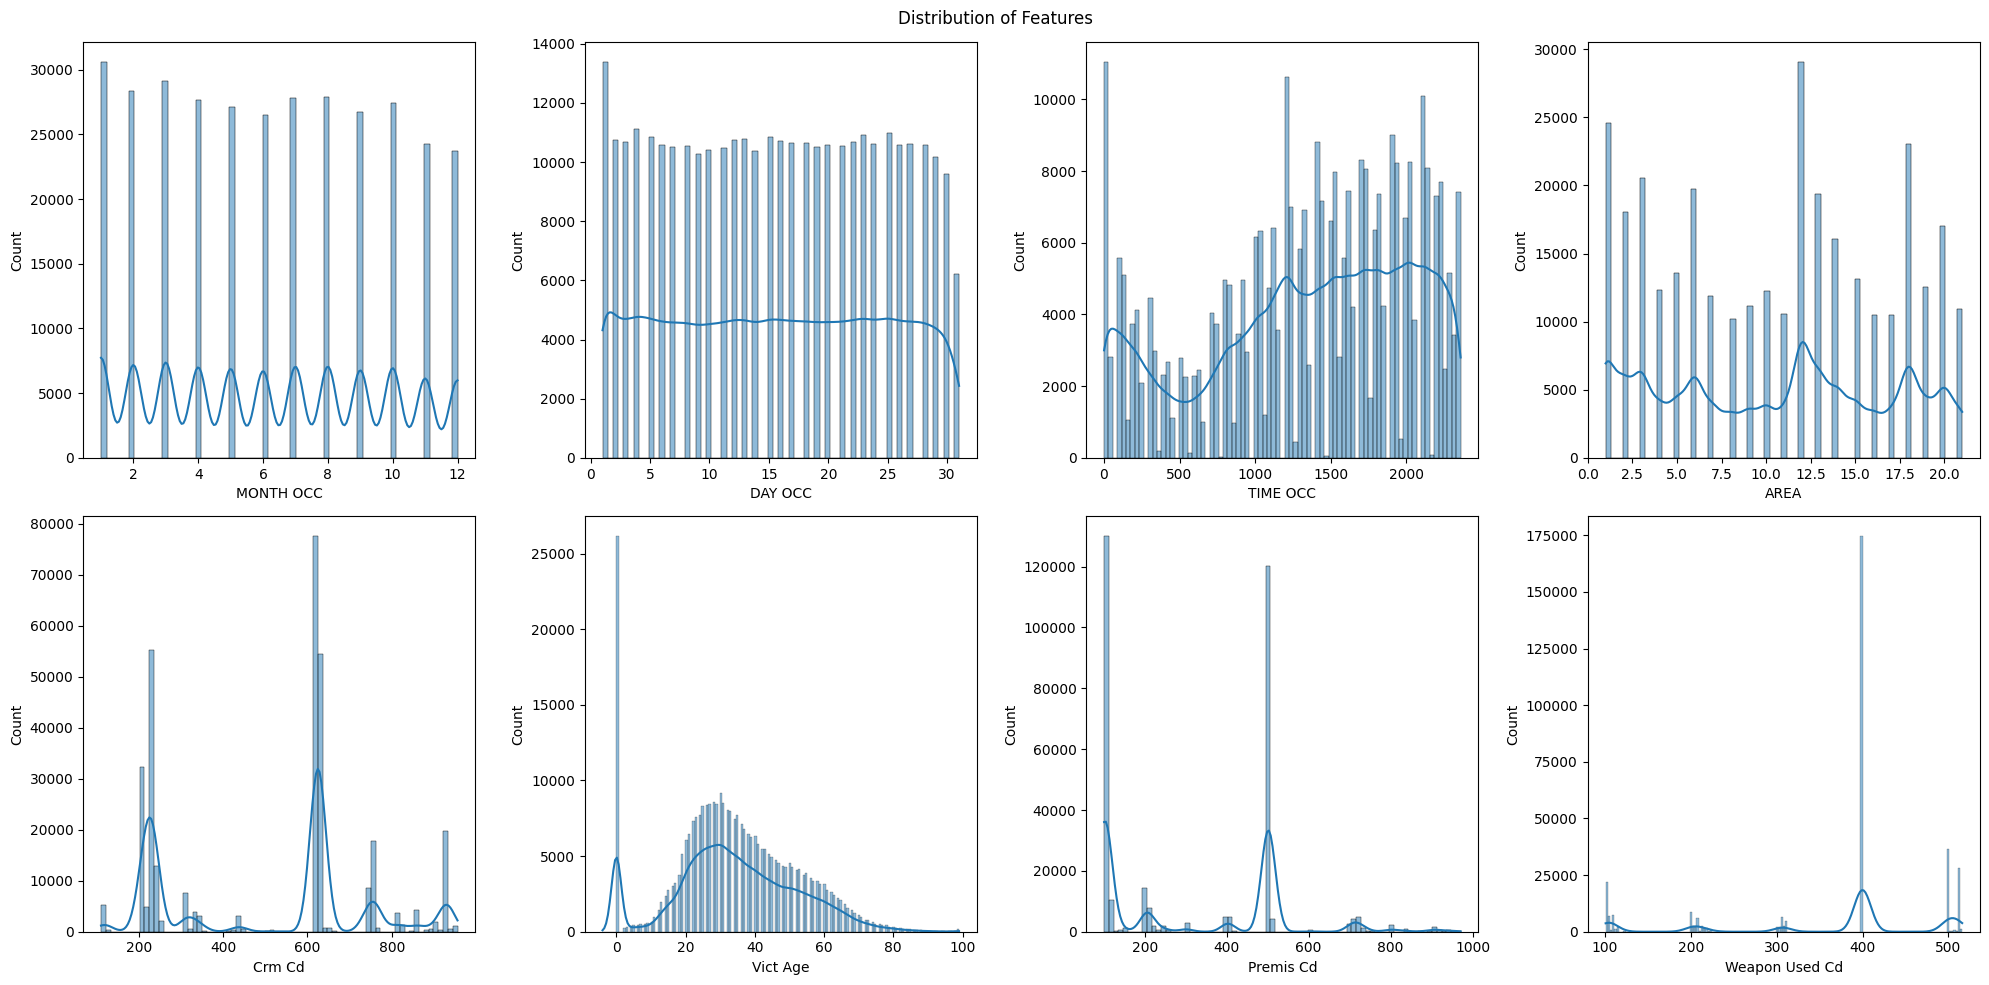

In [ ]:

# Assuming crimes_distribution is your DataFrame
numeric_columns = crimes_distribution.select_dtypes(include=['number']).columns

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot the distribution of each numeric feature
for i, feature in enumerate(numeric_columns):
    row = int(i / 4)
    col = i % 4
    sns.histplot(crimes_distribution[feature], ax=axs[row][col], kde=True)

plt.suptitle('Distribution of Features')
plt.tight_layout()
plt.show()

# **Key Insights:**

 • Crime is consistent throughout the year, with some fluctuations in specific months.

 • Crime rates vary by area, suggesting localized crime hotspots.

 • Crime time distribution suggests that certain hours have significantly higher criminal activity.

 • Young adults (20-40) are the most common victims of crime.

 • Specific crimes and weapons dominate, indicating a pattern in crime types.

## Description
As you can see those plots, features in 'crimes' are much less biased, considering non-preprocessed
But, 'Crm Cd', 'Premis Cd' and 'Weapon Used Cd' seem to be needed for log transformation
Additionally, 'Vict Age' which contains value of '0' are meaningless, so dropping those could be a good idea

In [ ]:
# Drop 'Vict Age' which value is '0'
Vict_Age_0 = crimes[crimes['Vict Age'] == 0].index
crimes.drop(Vict_Age_0, inplace=True)
crimes.reset_index(drop=True, inplace=True)
crimes

YEAR OCC  MONTH OCC  DAY OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0           2020          5       10      2200     1      Central     626   
1           2020         12        2      2245    12  77th Street     210   
2           2020          5        1      2330    12  77th Street     230   
3           2020          1       18       940     1      Central     624   
4           2020         11       15       310     2      Rampart     310   
...          ...        ...      ...       ...   ...          ...     ...   
300750      2024          2       26      1545     4   Hollenbeck     761   
300751      2024          1       13       720    16     Foothill     230   
300752      2024          1       16      1510    20      Olympic     624   
300753      2024         10       16      1546    14      Pacific     341   
300754      2024          4       24      1500     3    Southwest     230   

        Vict Age Vict Sex Vict Descent  Premis Cd  Weapon Used Cd Status  
0             30        F            W      502.0           400.0     AA  
1             21        M            H      101.0           511.0     IC  
2             28        F            B      501.0           201.0     IC  
3             42        M            A      502.0           400.0     AA  
4             36        M            W      210.0           500.0     IC  
...          ...      ...          ...        ...             ...    ...  
300750        18        M            H      102.0           101.0     IC  
300751        36        M            H      101.0           207.0     IC  
300752        80        F            O      124.0           400.0     IC  
300753        46        M            H      223.0           500.0     IC  
300754        70        F            W      102.0           308.0     IC  

[300755 rows x 13 columns]

•	Victim Age = 0 may indicate invali data.

•	Dropping these rows helps improve data quality.

•	Resetting the index ensures it remains sequential (avoiding gaps from removed rows).


In [ ]:
# Log Transformation
Crm_Cd_Log = np.log1p(crimes['Crm Cd'])
Premis_Cd_Log = np.log1p(crimes['Premis Cd'])
Weapon_Used_Cd_Log = np.log1p(crimes['Weapon Used Cd'])

crimes.insert(7, 'Crm Cd Log', Crm_Cd_Log)
crimes.insert(12, 'Premis Cd Log', Premis_Cd_Log)
crimes.insert(14, 'Weapon Used Cd Log', Weapon_Used_Cd_Log)

crimes

YEAR OCC  MONTH OCC  DAY OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0           2020          5       10      2200     1      Central     626   
1           2020         12        2      2245    12  77th Street     210   
2           2020          5        1      2330    12  77th Street     230   
3           2020          1       18       940     1      Central     624   
4           2020         11       15       310     2      Rampart     310   
...          ...        ...      ...       ...   ...          ...     ...   
300750      2024          2       26      1545     4   Hollenbeck     761   
300751      2024          1       13       720    16     Foothill     230   
300752      2024          1       16      1510    20      Olympic     624   
300753      2024         10       16      1546    14      Pacific     341   
300754      2024          4       24      1500     3    Southwest     230   

        Crm Cd Log  Vict Age Vict Sex Vict Descent  Premis Cd  Premis Cd Log  \
0         6.440947        30        F            W      502.0       6.220590   
1         5.351858        21        M            H      101.0       4.624973   
2         5.442418        28        F            B      501.0       6.218600   
3         6.437752        42        M            A      502.0       6.220590   
4         5.739793        36        M            W      210.0       5.351858   
...            ...       ...      ...          ...        ...            ...   
300750    6.635947        18        M            H      102.0       4.634729   
300751    5.442418        36        M            H      101.0       4.624973   
300752    6.437752        80        F            O      124.0       4.828314   
300753    5.834811        46        M            H      223.0       5.411646   
300754    5.442418        70        F            W      102.0       4.634729   

        Weapon Used Cd  Weapon Used Cd Log Status  
0                400.0            5.993961     AA  
1                511.0            6.238325     IC  
2                201.0            5.308268     IC  
3                400.0            5.993961     AA  
4                500.0            6.216606     IC  
...                ...                 ...    ...  
300750           101.0            4.624973     IC  
300751           207.0            5.337538     IC  
300752           400.0            5.993961     IC  
300753           500.0            6.216606     IC  
300754           308.0            5.733341     IC  

[300755 rows x 16 columns]

**Log transformation** is a mathematical technique used to normalize skewed data by applying a logarithmic function. It is commonly used when a dataset has a highly skewed distribution with extreme values.

**Normalization:** The new log-transformed features are less skewed and easier to analyze.

**Feature Engineering:** These new columns can be used instead of the original ones for better model performance.

In [ ]:
# Check distribution of columns log transformation processed
crimes_distribution_log = crimes[['Crm Cd Log', 'Premis Cd Log', 'Weapon Used Cd Log']]
crimes_distribution_log

Crm Cd Log  Premis Cd Log  Weapon Used Cd Log
0         6.440947       6.220590            5.993961
1         5.351858       4.624973            6.238325
2         5.442418       6.218600            5.308268
3         6.437752       6.220590            5.993961
4         5.739793       5.351858            6.216606
...            ...            ...                 ...
300750    6.635947       4.634729            4.624973
300751    5.442418       4.624973            5.337538
300752    6.437752       4.828314            5.993961
300753    5.834811       5.411646            6.216606
300754    5.442418       4.634729            5.733341

[300755 rows x 3 columns]

### **Note:**

 Less skewed distributions (closer to a normal shape).

 No extreme peaks that were present before transformation.

 Better spread of data, making it easier for machine learning models to learn.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

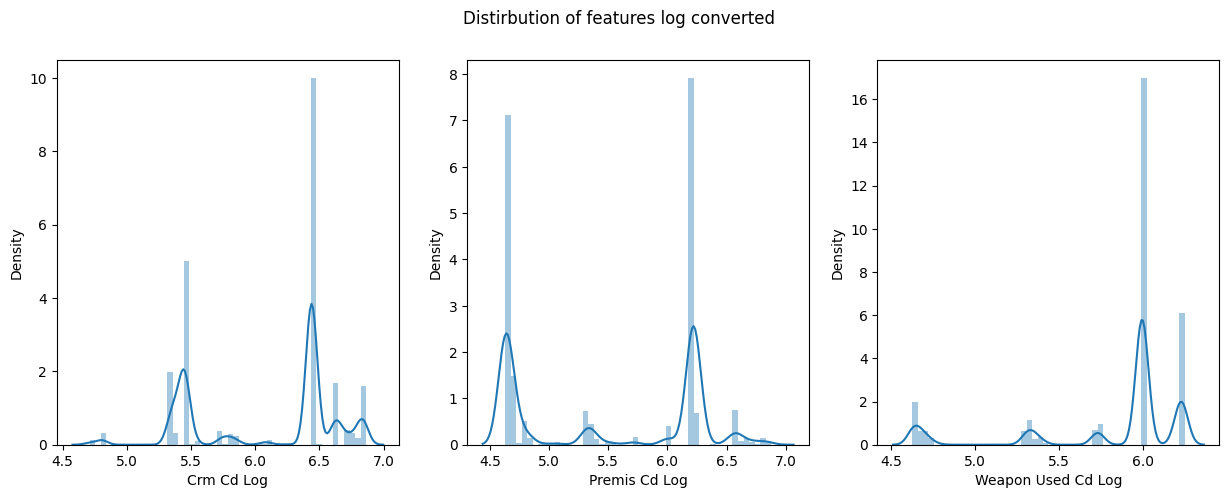

In [ ]:
# Check distribution of each features
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, feature in enumerate(crimes_distribution_log.columns):
    col = i%3
    sns.distplot(crimes_distribution_log.iloc[:, i], ax=axs[col])

plt.suptitle('Distirbution of features log converted')
plt.tight_layout

**Crm Cd Log**

•Several distinct peaks indicate certain crime categories occur more frequently.

•Some low-density regions suggest less common crime types.

**Premis Cd Log**

•Similar pattern: high peaks for certain premises.

•Some rare premises might still have outlier values.

**Weapon Used Cd Log**

•A strong peak around 6.0, possibly representing firearms or knives, which might be the most used weapons.

•A few smaller peaks suggest other weapon categories exist but are less frequent.

<Axes: title={'center': 'Correlation of features'}>

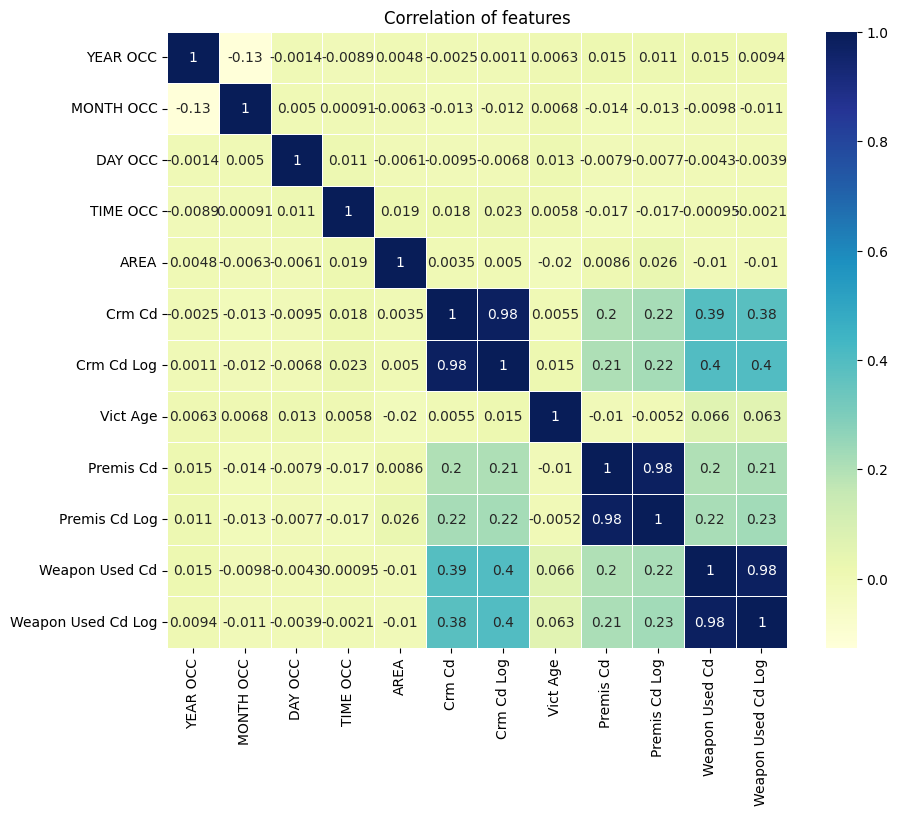

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
# Select only numeric columns for correlation calculation
numeric_crimes = crimes.select_dtypes(include=np.number)
sns.heatmap(numeric_crimes.corr(), annot=True, linewidths=.5, cmap="YlGnBu")


### **Log-Transformed vs. Original Features**

'Crm Cd' and 'Crm Cd Log' are highly correlated (~0.98).

'Premis Cd' and 'Premis Cd Log', 'Weapon Used Cd' and 'Weapon Used Cd Log' also show strong positive correlations (~0.98).

This is expected, as log transformation only scales the values but maintains their order.



'YEAR OCC', 'MONTH OCC', 'DAY OCC', and 'TIME OCC' show very low correlation with other features (~0 to -0.01).

'Vict Age' has low correlation with crime-related features.

'AREA' has little to no relationship with most crime-related features.
Crime & Weapon Usage

'Crm Cd' has a moderate positive correlation (~0.39-0.4) with 'Weapon Used Cd'.
Interpretation: Some crime codes are more likely to involve weapons.
Premises Code & Crime Code

'Premis Cd' and 'Crm Cd' have moderate correlation (~0.2-0.22).
Interpretation: Certain premises (locations) might be associated with specific types of crimes.

### **Description**

We could find relatively big correlation among Crimes, Premis and Weapon Used
Therefore, we can those feature as main for training

In [ ]:
# Process MinMaxScaling in order to make heatmap
crimes_scaled = crimes.copy()
except_features = ['MONTH OCC', 'AREA NAME', 'Vict Sex', 'Vict Descent', 'Status'] # features on this list will not be scaled
features = np.array(crimes.drop(except_features, axis=1, inplace=False).columns).reshape(-1, 1)

for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(crimes_scaled[feature])
    crimes_scaled[feature] = scaler.transform(crimes_scaled[feature])

crimes_scaled

YEAR OCC  MONTH OCC   DAY OCC  TIME OCC  AREA    AREA NAME    Crm Cd  \
0            0.0          5  0.300000  0.932570  0.00      Central  0.609929   
1            0.0         12  0.033333  0.951654  0.55  77th Street  0.118203   
2            0.0          5  0.000000  0.987701  0.55  77th Street  0.141844   
3            0.0          1  0.566667  0.398219  0.00      Central  0.607565   
4            0.0         11  0.466667  0.131043  0.05      Rampart  0.236407   
...          ...        ...       ...       ...   ...          ...       ...   
300750       1.0          2  0.833333  0.654792  0.15   Hollenbeck  0.769504   
300751       1.0          1  0.400000  0.304919  0.75     Foothill  0.141844   
300752       1.0          1  0.500000  0.639949  0.95      Olympic  0.607565   
300753       1.0         10  0.500000  0.655216  0.65      Pacific  0.273050   
300754       1.0          4  0.766667  0.635708  0.10    Southwest  0.141844   

        Crm Cd Log  Vict Age Vict Sex Vict Descent  Premis Cd  Premis Cd Log  \
0         0.803713  0.330097        F            W   0.460920       0.707785   
1         0.298165  0.242718        M            H   0.000000       0.000000   
2         0.340202  0.310680        F            B   0.459770       0.706902   
3         0.802229  0.446602        M            A   0.460920       0.707785   
4         0.478241  0.388350        M            W   0.125287       0.322432   
...            ...       ...      ...          ...        ...            ...   
300750    0.894230  0.213592        M            H   0.001149       0.004328   
300751    0.340202  0.388350        M            H   0.000000       0.000000   
300752    0.802229  0.815534        F            O   0.026437       0.090198   
300753    0.522348  0.485437        M            H   0.140230       0.348953   
300754    0.340202  0.718447        F            W   0.001149       0.004328   

        Weapon Used Cd  Weapon Used Cd Log Status  
0             0.720482            0.843456     AA  
1             0.987952            0.994012     IC  
2             0.240964            0.420989     IC  
3             0.720482            0.843456     AA  
4             0.961446            0.980631     IC  
...                ...                 ...    ...  
300750        0.000000            0.000000     IC  
300751        0.255422            0.439023     IC  
300752        0.720482            0.843456     IC  
300753        0.961446            0.980631     IC  
300754        0.498795            0.682884     IC  

[300755 rows x 16 columns]

### **Note:**

 Helps normalize different feature scales .

 Prevents larger values from dominating smaller ones in ML models.

In [ ]:
# Create DataFrame processed groupby on 'Month'
crimes_month = crimes_scaled.groupby(by='MONTH OCC').mean(numeric_only=True)
crimes_month.drop(['YEAR OCC'], axis=1, inplace=True)
crimes_month

DAY OCC  TIME OCC      AREA    Crm Cd  Crm Cd Log  Vict Age  \
MONTH OCC                                                                 
1          0.496092  0.563261  0.474617  0.480492    0.651125  0.399081   
2          0.459084  0.572846  0.476992  0.482515    0.653453  0.398612   
3          0.488885  0.576167  0.483254  0.481387    0.653036  0.401376   
4          0.485596  0.575788  0.491619  0.479662    0.651181  0.402934   
5          0.485797  0.571933  0.486494  0.476924    0.648895  0.401866   
6          0.483972  0.570125  0.483645  0.472674    0.644083  0.406462   
7          0.493424  0.569825  0.478251  0.469829    0.642484  0.407030   
8          0.504172  0.569747  0.476465  0.473744    0.645839  0.403889   
9          0.479675  0.572922  0.478916  0.474607    0.646199  0.403234   
10         0.491355  0.567849  0.474258  0.474105    0.645667  0.399598   
11         0.473370  0.569997  0.478107  0.471328    0.643813  0.401632   
12         0.490470  0.574504  0.472120  0.471164    0.644324  0.404210   

           Premis Cd  Premis Cd Log  Weapon Used Cd  Weapon Used Cd Log  
MONTH OCC                                                                
1           0.259520       0.395319        0.639191            0.735779  
2           0.256777       0.389678        0.645135            0.741963  
3           0.262152       0.397684        0.644678            0.742536  
4           0.254333       0.387594        0.642007            0.739530  
5           0.252349       0.384725        0.640137            0.737673  
6           0.241972       0.371722        0.634162            0.731251  
7           0.239526       0.369549        0.634174            0.732219  
8           0.244446       0.373186        0.637880            0.735236  
9           0.247345       0.377324        0.636977            0.733451  
10          0.246333       0.375554        0.635084            0.731407  
11          0.252777       0.385606        0.637238            0.733779  
12          0.254637       0.389741        0.633149            0.728962

✅ Detects seasonal trends

✅ Finds monthly patterns

✅ Helps in predictive modeling

<Axes: title={'center': 'Correlation of Crimes by Month'}, ylabel='MONTH OCC'>

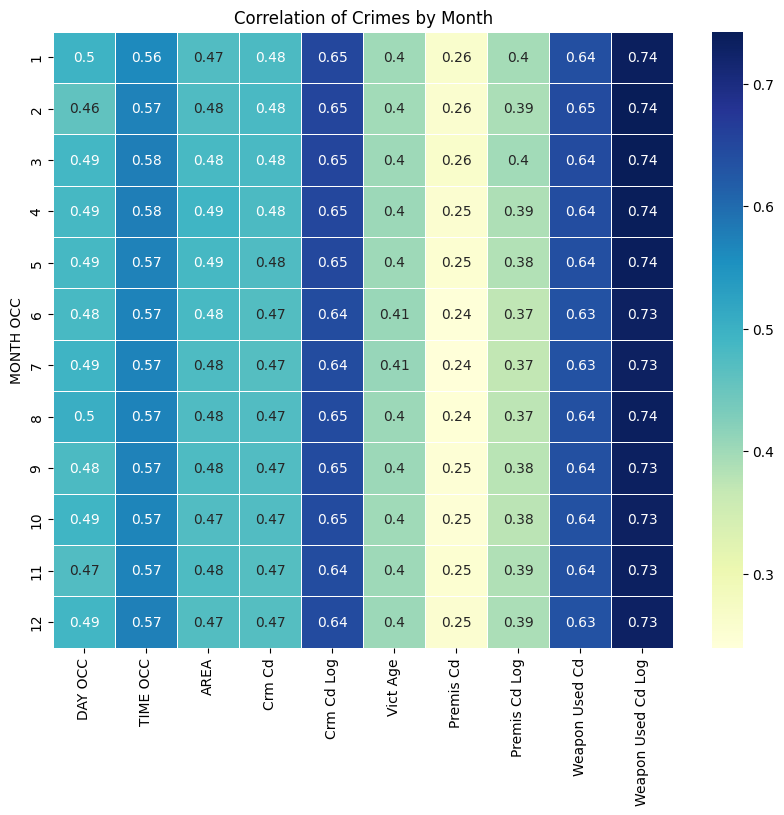

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of Crimes by Month')
sns.heatmap(crimes_month, annot=True, linewidths=.5, cmap="YlGnBu")

**Interpretation of Correlation Values**

Higher values (~0.7 - 0.74, dark blue cells) → Stronger correlation.

Medium values (~0.5 - 0.6, teal cells) → Moderate correlation.

Lower values (~0.2 - 0.3, light yellow cells) → Weak correlation.

**Observations:**

Weapon Used Cd and Weapon Used Cd Log show a strong correlation (~0.73 - 0.74) with months, indicating weapon usage patterns vary across months.

Crm Cd Log has a consistent correlation (~0.64 - 0.65) across months,
suggesting crime types are somewhat seasonally influenced.

DAY OCC, TIME OCC, and AREA have moderate correlations (~0.5 - 0.57).

Vict Age and Premis Cd have low correlations (~0.24 - 0.26), meaning these factors don't fluctuate significantly across months.

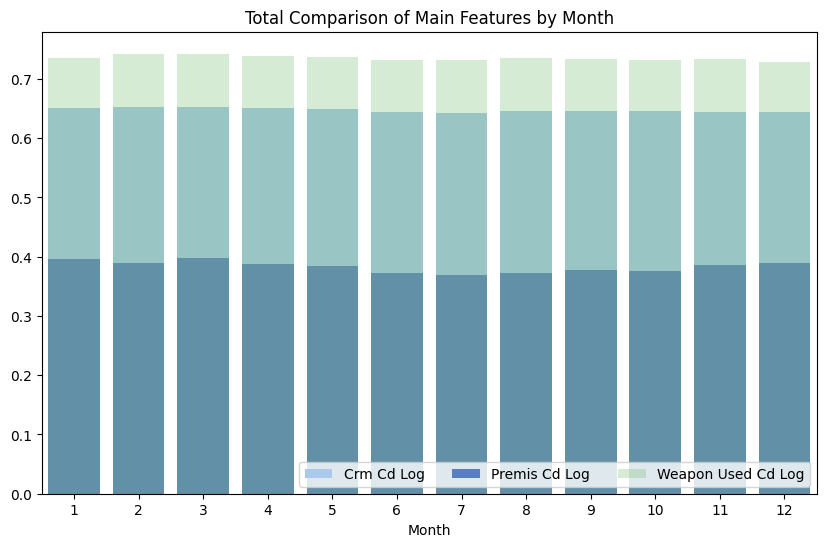

In [ ]:
# Plot barplot
crimes_month = crimes_scaled.groupby(by='MONTH OCC', as_index=False).mean(numeric_only=True)
crimes_month.drop(['YEAR OCC'], axis=1, inplace=True)

sns.set_theme="whitegrid"
f, ax = plt.subplots(figsize=(10, 6))

## Plot 'Crm Cd Log'
sns.set_color_codes("pastel")
sns.barplot(x="MONTH OCC", y="Crm Cd Log", data=crimes_month, label="Crm Cd Log", color="b")

## Plot 'Premis Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="MONTH OCC", y="Premis Cd Log", data=crimes_month, label="Premis Cd Log", color="b")

## Plot 'Weapon Used Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="MONTH OCC", y="Weapon Used Cd Log", data=crimes_month, label="Weapon Used Cd Log", color="g", alpha=0.3)

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Month")
plt.title("Total Comparison of Main Features by Month")

plt.show()



X-Axis: Represents the months (1 to 12).

Y-Axis: Represents the normalized values of three features.

Bars: Each bar is divided into three stacked segments, representing:

Dark Blue (Bottom): Crm Cd Log (Crime Code Log)
Teal Blue (Middle): Premis Cd Log (Premises Code Log)
Light Green (Top): Weapon Used Cd Log (Weapon Used Code Log



Consistent Crime Patterns: The relative proportions of each feature remain fairly stable across months.

Largest Contribution: Crm Cd Log (crime category codes) makes up the largest share in each month.

Medium Contribution: Premis Cd Log (location-based crime data) stays nearly constant across months.

Smallest Contribution: Weapon Used Cd Log has the smallest proportion, meaning weapon-related crimes form a minor but consistent part of the dataset.

No Significant Seasonal Trends: No major spikes or dips are visible across months, suggesting no strong seasonality in crime trends for these three features.

## **Description**

Grouping by month, we could compare features.
Especially, on August, crime rates was little bit smaller than any other months.

Normalization (0-1 range) improves visualization (e.g., heatmaps).

Ensures equal weighting of numerical features.

Prevents model bias when used in machine learning.

In [ ]:
# Process MinMaxScaling in order to make heatmap
crimes_scaled = crimes.copy()
except_features = ['DAY OCC', 'AREA NAME', 'Vict Sex', 'Vict Descent', 'Status'] # features on this list will not be scaled
features = np.array(crimes.drop(except_features, axis=1, inplace=False).columns).reshape(-1, 1)

for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(crimes_scaled[feature])
    crimes_scaled[feature] = scaler.transform(crimes_scaled[feature])

In [ ]:
# Create DataFrame processed groupby on 'Day'
crimes_day = crimes_scaled.groupby(by='DAY OCC').mean(numeric_only=True)
crimes_day.drop(['YEAR OCC'], axis=1, inplace=True)
crimes_day

MONTH OCC  TIME OCC      AREA    Crm Cd  Crm Cd Log  Vict Age  \
DAY OCC                                                                  
1         0.457717  0.518250  0.493244  0.500918    0.662212  0.374713   
2         0.481459  0.574918  0.480914  0.477210    0.648787  0.403001   
3         0.487197  0.575223  0.482884  0.476800    0.648969  0.405716   
4         0.487285  0.577050  0.475015  0.476275    0.648279  0.403131   
5         0.495389  0.568548  0.478690  0.472968    0.644845  0.405239   
6         0.484218  0.572416  0.474740  0.473431    0.646193  0.404809   
7         0.488447  0.577474  0.479143  0.477149    0.650092  0.406544   
8         0.485561  0.576421  0.480580  0.480509    0.651969  0.405096   
9         0.487552  0.578656  0.484694  0.473284    0.645992  0.403572   
10        0.479894  0.575650  0.483448  0.475569    0.646756  0.401964   
11        0.485957  0.571809  0.479246  0.473689    0.644673  0.402508   
12        0.484206  0.570170  0.482571  0.478010    0.649190  0.403849   
13        0.479573  0.571357  0.475611  0.476946    0.648478  0.401640   
14        0.482218  0.570445  0.480095  0.471244    0.644087  0.402299   
15        0.477049  0.577525  0.483512  0.474858    0.646870  0.400404   
16        0.476697  0.577291  0.480741  0.477813    0.650239  0.400853   
17        0.483875  0.576919  0.481310  0.476502    0.648664  0.401303   
18        0.477361  0.570870  0.483582  0.473920    0.646740  0.404044   
19        0.483683  0.573654  0.476199  0.473752    0.645936  0.402422   
20        0.479564  0.567677  0.478274  0.476161    0.648107  0.403283   
21        0.474492  0.570415  0.475391  0.470286    0.642734  0.406755   
22        0.482297  0.577183  0.479242  0.474210    0.647092  0.404622   
23        0.481343  0.573485  0.474623  0.472200    0.645501  0.404407   
24        0.480061  0.573792  0.478911  0.473899    0.647076  0.404042   
25        0.485768  0.569856  0.475232  0.475980    0.648207  0.402624   
26        0.473019  0.564562  0.482211  0.475964    0.648489  0.403907   
27        0.475619  0.575990  0.477778  0.472164    0.644958  0.405934   
28        0.464424  0.575655  0.473373  0.474302    0.645629  0.405200   
29        0.495769  0.573325  0.477052  0.473062    0.646050  0.403827   
30        0.517538  0.570443  0.478233  0.471543    0.643421  0.402666   
31        0.502031  0.575695  0.476689  0.473190    0.645726  0.403005   

         Premis Cd  Premis Cd Log  Weapon Used Cd  Weapon Used Cd Log  
DAY OCC                                                                
1         0.282823       0.429805        0.650512            0.749220  
2         0.248880       0.379062        0.631859            0.728963  
3         0.247022       0.379360        0.639241            0.735804  
4         0.250066       0.382595        0.637133            0.733693  
5         0.250495       0.381525        0.639578            0.735703  
6         0.248372       0.379093        0.639119            0.735575  
7         0.245969       0.374460        0.641066            0.738325  
8         0.252290       0.383023        0.641415            0.737212  
9         0.244224       0.372854        0.638689            0.735294  
10        0.254470       0.387858        0.636037            0.733041  
11        0.249246       0.379556        0.635698            0.731339  
12        0.249626       0.381136        0.638647            0.734916  
13        0.251302       0.382591        0.637427            0.734927  
14        0.247446       0.378600        0.637187            0.734830  
15        0.253802       0.387245        0.635232            0.731911  
16        0.248069       0.378211        0.641941            0.739576  
17        0.245503       0.375297        0.646733            0.742780  
18        0.247832       0.379195        0.641385            0.738787  
19        0.259027       0.393289        0.636801            0.733477  
20        0.254932       0.388901        0.636485     

### **Note:**

Each row represents a day of the month, showing the average values of different crime-related attributes.


'MONTH OCC' → Normalized value of the month of occurrence.

'TIME OCC' → Normalized value of time the crime happened.

'AREA' → Encoded area/location of the crime.

'Crm Cd' & 'Crm Cd Log' → Crime codes (log-transformed versions included).

'Vict Age' → Average age of victims for crimes occurring on that day.


'Weapon Used Cd' & 'Weapon Used Cd Log' → Weapons used in crimes.


<Axes: title={'center': 'Correlation of Crimes by Day'}, ylabel='DAY OCC'>

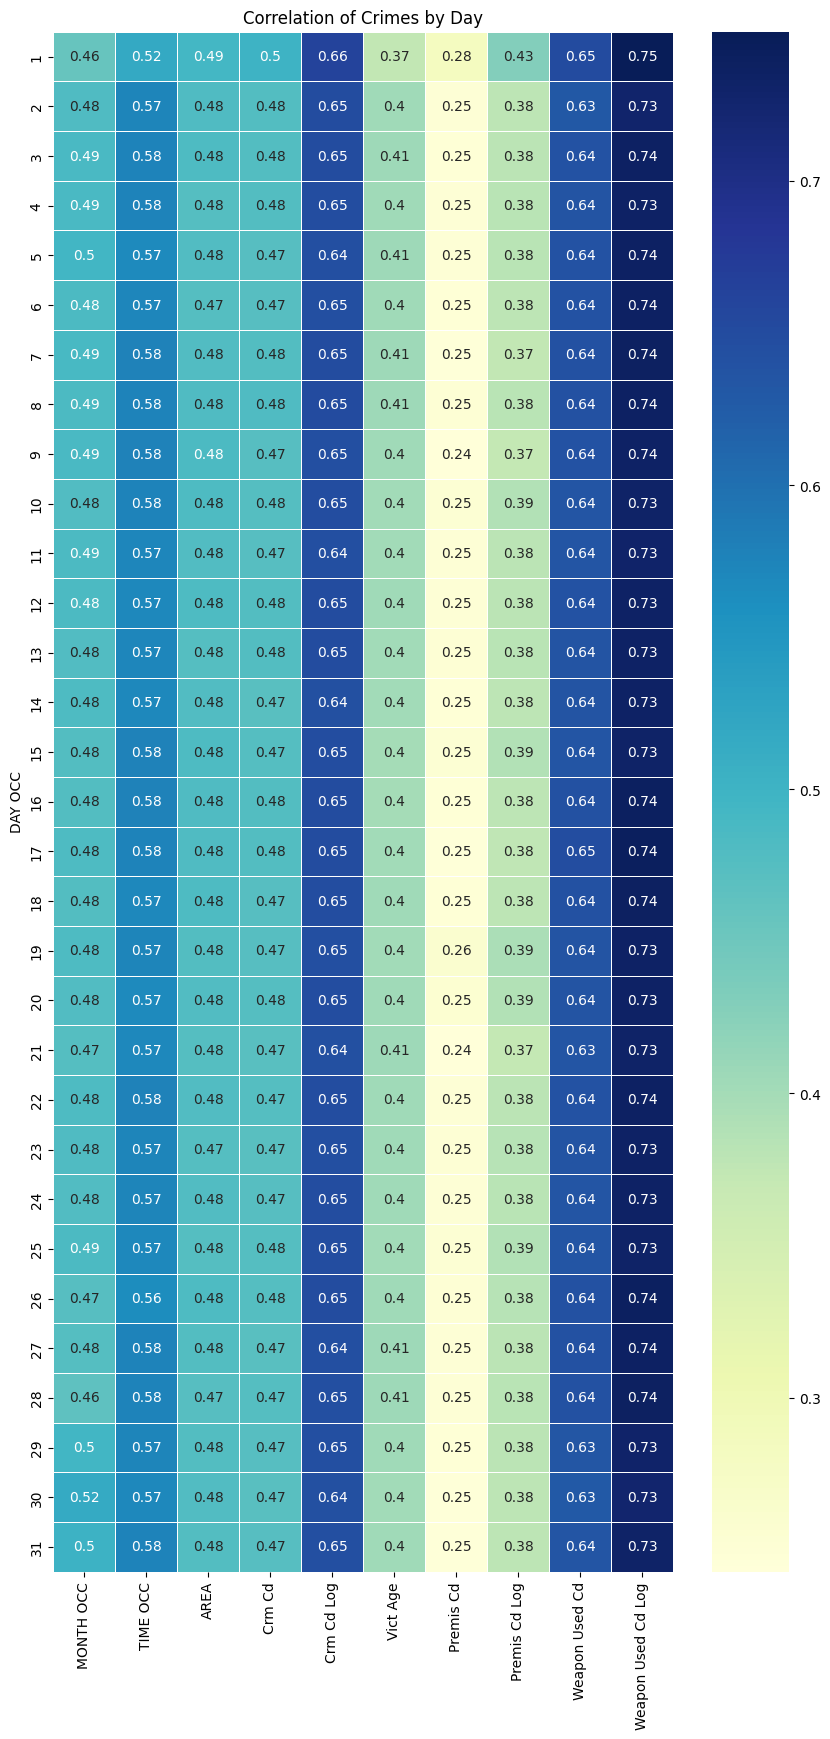

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 20))
plt.title('Correlation of Crimes by Day')
sns.heatmap(crimes_day, annot=True, linewidths=.5, cmap="YlGnBu")

### **Note:**

High Correlation (~0.7 - 0.75) for "Crm Cd Log" & "Weapon Used Cd Log":

Suggests that the type of crime is closely related to the weapons used.
Crimes occurring on different days have similar patterns in crime codes and weapons used.
Moderate Correlation (~0.5 - 0.6) for "MONTH OCC" and "TIME OCC":

Time and month of occurrence have a moderate relationship with other crime factors.
Low Correlation (~0.2 - 0.3) for "Vict Age" and "Premis Cd":

The age of the victim and premises codes do not strongly correlate with daily crime trends.

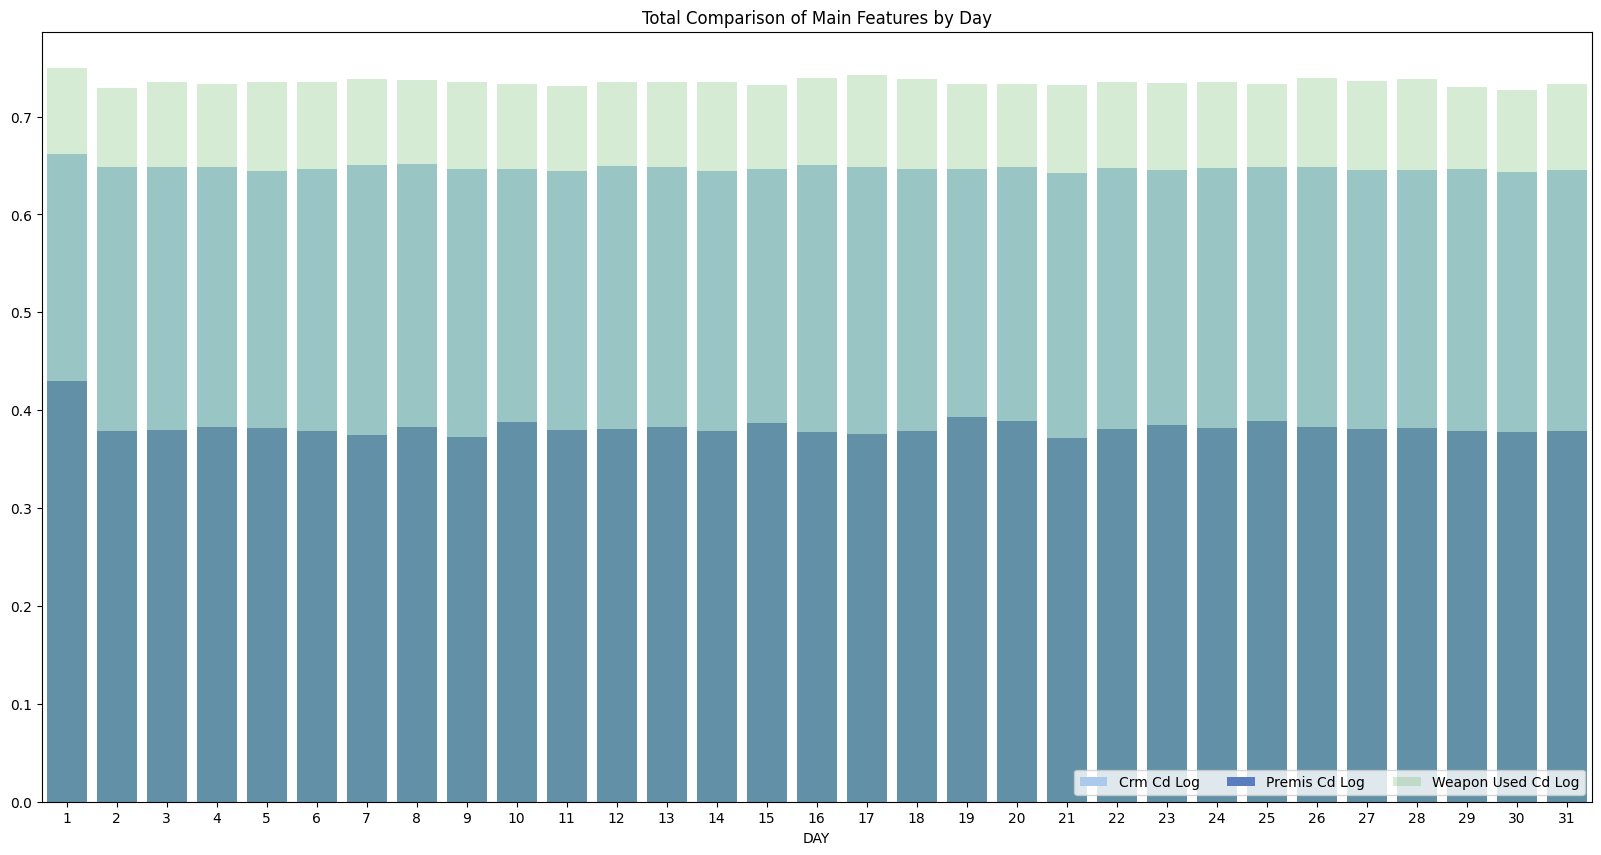

In [ ]:
# Plot barplot
crimes_day = crimes_scaled.groupby(by='DAY OCC', as_index=False).mean(numeric_only =True)
crimes_day.drop(['YEAR OCC'], axis=1, inplace=True)

sns.set_theme="whitegrid"
f, ax = plt.subplots(figsize=(20, 10))

## Plot 'Crm Cd Log'
sns.set_color_codes("pastel")
sns.barplot(x="DAY OCC", y="Crm Cd Log", data=crimes_day, label="Crm Cd Log", color="b")

## Plot 'Premis Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="DAY OCC", y="Premis Cd Log", data=crimes_day, label="Premis Cd Log", color="b")

## Plot 'Weapon Used Cd Log'
sns.set_color_codes("muted")
sns.barplot(x="DAY OCC", y="Weapon Used Cd Log", data=crimes_day, label="Weapon Used Cd Log", color="g", alpha=0.3)

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="DAY")
plt.title("Total Comparison of Main Features by Day")

plt.show()

 Observations & Insights

The total height of the bars is almost consistent across all days, meaning these features maintain relatively stable values throughout the month.

Weapon Used Cd Log (Light Green) has lower values compared to the other two features.

The Crm Cd Log (Dark Blue) consistently takes up a large portion, suggesting that crime type patterns remain steady across days.

There are slight variations between days, particularly in Premis Cd Log and Weapon Used Cd Log, but overall, the proportions remain similar.

### **Description**

As you saw on distribution of 'DAY OCC', the distribution of it was homogeneous.
Crime Codes and Weapon Used Codes was also high like previous on

In [ ]:
crimes_train = crimes.drop(['AREA NAME', 'Vict Descent', 'Status'] ,axis=1, inplace=False)
crimes_train = pd.get_dummies(crimes_train)
crimes_train

YEAR OCC  MONTH OCC  DAY OCC  TIME OCC  AREA  Crm Cd  Crm Cd Log  \
0           2020          5       10      2200     1     626    6.440947   
1           2020         12        2      2245    12     210    5.351858   
2           2020          5        1      2330    12     230    5.442418   
3           2020          1       18       940     1     624    6.437752   
4           2020         11       15       310     2     310    5.739793   
...          ...        ...      ...       ...   ...     ...         ...   
300750      2024          2       26      1545     4     761    6.635947   
300751      2024          1       13       720    16     230    5.442418   
300752      2024          1       16      1510    20     624    6.437752   
300753      2024         10       16      1546    14     341    5.834811   
300754      2024          4       24      1500     3     230    5.442418   

        Vict Age  Premis Cd  Premis Cd Log  Weapon Used Cd  \
0             30      502.0       6.220590           400.0   
1             21      101.0       4.624973           511.0   
2             28      501.0       6.218600           201.0   
3             42      502.0       6.220590           400.0   
4             36      210.0       5.351858           500.0   
...          ...        ...            ...             ...   
300750        18      102.0       4.634729           101.0   
300751        36      101.0       4.624973           207.0   
300752        80      124.0       4.828314           400.0   
300753        46      223.0       5.411646           500.0   
300754        70      102.0       4.634729           308.0   

        Weapon Used Cd Log  Vict Sex_F  Vict Sex_H  Vict Sex_M  Vict Sex_X  
0                 5.993961        True       False       False       False  
1                 6.238325       False       False        True       False  
2                 5.308268        True       False       False       False  
3                 5.993961       False       False        True       False  
4                 6.216606       False       False        True       False  
...                    ...         ...         ...         ...         ...  
300750            4.624973       False       False        True       False  
300751            5.337538       False       False        True       False  
300752            5.993961        True       False       False       False  
300753            6.216606       False       False        True       False  
300754            5.733341        True       False       False       False  

[300755 rows x 16 columns]

### **Note:**

One-Hot Encoding (Vict Sex_F, Vict Sex_M, Vict Sex_H):
Instead of a categorical column for gender, it's been converted into separate binary columns for each gender type.

In [ ]:
# MinMax Scaling of DataFrame
features = np.array(crimes_train.columns).reshape(-1, 1)

for feature in features:
    scaler = MinMaxScaler()
    scaler.fit(crimes_train[feature])
    crimes_train[feature] = scaler.transform(crimes_train[feature])

crimes_train

YEAR OCC  MONTH OCC   DAY OCC  TIME OCC  AREA    Crm Cd  Crm Cd Log  \
0            0.0   0.363636  0.300000  0.932570  0.00  0.609929    0.803713   
1            0.0   1.000000  0.033333  0.951654  0.55  0.118203    0.298165   
2            0.0   0.363636  0.000000  0.987701  0.55  0.141844    0.340202   
3            0.0   0.000000  0.566667  0.398219  0.00  0.607565    0.802229   
4            0.0   0.909091  0.466667  0.131043  0.05  0.236407    0.478241   
...          ...        ...       ...       ...   ...       ...         ...   
300750       1.0   0.090909  0.833333  0.654792  0.15  0.769504    0.894230   
300751       1.0   0.000000  0.400000  0.304919  0.75  0.141844    0.340202   
300752       1.0   0.000000  0.500000  0.639949  0.95  0.607565    0.802229   
300753       1.0   0.818182  0.500000  0.655216  0.65  0.273050    0.522348   
300754       1.0   0.272727  0.766667  0.635708  0.10  0.141844    0.340202   

        Vict Age  Premis Cd  Premis Cd Log  Weapon Used Cd  \
0       0.330097   0.460920       0.707785        0.720482   
1       0.242718   0.000000       0.000000        0.987952   
2       0.310680   0.459770       0.706902        0.240964   
3       0.446602   0.460920       0.707785        0.720482   
4       0.388350   0.125287       0.322432        0.961446   
...          ...        ...            ...             ...   
300750  0.213592   0.001149       0.004328        0.000000   
300751  0.388350   0.000000       0.000000        0.255422   
300752  0.815534   0.026437       0.090198        0.720482   
300753  0.485437   0.140230       0.348953        0.961446   
300754  0.718447   0.001149       0.004328        0.498795   

        Weapon Used Cd Log  Vict Sex_F  Vict Sex_H  Vict Sex_M  Vict Sex_X  
0                 0.843456         1.0         0.0         0.0         0.0  
1                 0.994012         0.0         0.0         1.0         0.0  
2                 0.420989         1.0         0.0         0.0         0.0  
3                 0.843456         0.0         0.0         1.0         0.0  
4                 0.980631         0.0         0.0         1.0         0.0  
...                    ...         ...         ...         ...         ...  
300750            0.000000         0.0         0.0         1.0         0.0  
300751            0.439023         0.0         0.0         1.0         0.0  
300752            0.843456         1.0         0.0         0.0         0.0  
300753            0.980631         0.0         0.0         1.0         0.0  
300754            0.682884         1.0         0.0         0.0         0.0  

[300755 rows x 16 columns]

### **Note:**

✅ Before Scaling:

Raw values in different ranges (e.g., YEAR OCC is in thousands, Crm Cd has large numbers).

Some features have high variance.

✅ After Scaling:

All values are between 0 and 1.

Large-scale values (e.g., year 2024) are converted into decimals.

Data is now more uniform and comparable across different columns.


### **Split Datasets**

In [ ]:
# Define features and label for training
train_features = crimes[['YEAR OCC', 'MONTH OCC', 'DAY OCC', 'TIME OCC', 'AREA', 'Vict Age', 'Premis Cd Log', 'Weapon Used Cd Log']]
train_label = crimes['Crm Cd Log'].astype(int)

In [ ]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (240604, 8)
Shape of X_test:  (60151, 8)
Shape of y_train:  (240604,)
Shape of y_test:  (60151,)


### **Note:**

Splits the data into training (80%) and testing (20%) sets.


X_train: 240,604 rows (samples) and 8 columns (features).

X_test: 60,151 rows and 8 features.

This means there are 8 independent variables used for training and testing.

Target Variable (y_train & y_test):

y_train: 240,604 labels corresponding to X_train.

y_test: 60,151 labels corresponding to X_test.

These represent the crime categories (crime codes).

Regression

Logistic Regression

In [ ]:
# Logistic Regression is one of the most fundamental estimator.
# So, let's try with Logistic Regression, first.

lr_reg = LogisticRegression(solver='liblinear')
lr_reg.fit(X_train, y_train)
lr_preds = lr_reg.predict(X_test)
lr_preds_proba = lr_reg.predict_proba(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(lr_mse, lr_mse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, lr_preds)))
print('Accuracy Score : {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('ROC_AUC Score : {0:.3f}'.format(roc_auc_score(y_test, lr_preds_proba, multi_class='ovr')))

MSE : 0.324, RMSE : 0.324
Variance Score : -0.174
Accuracy Score : 0.716
ROC_AUC Score : 0.705


MSE (Mean Squared Error): Measures the average squared difference between actual and predicted values.

RMSE (Root Mean Squared Error): A more interpretable version of MSE, representing the error in the original unit scale.

R² Score: Measures how well the model explains variance in the data

✅ Decent Accuracy (71.6%): The model performs reasonably well.

❌ Negative Variance Score (-0.174): The model does not explain variance well.

✅ Good ROC AUC (0.705): The model differentiates between classes fairly well.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Optimize for Logistic Regression Model
params = {'penalty' : ['l2', 'l1'], 'C' : [0.01, 0.1, 1, 1, 5, 10]}

grid_lr = GridSearchCV(lr_reg, param_grid=params, scoring='accuracy', cv=3)
grid_lr.fit(train_features, train_label)
print('The Best Hyperparameter for Optimization : {}'.format(grid_lr.best_params_))
print('The Accuracy Score of Averages for Optimization : {0:.3f}'.format(grid_lr.best_score_))

The Best Hyperparameter for Optimization : {'C': 1, 'penalty': 'l1'}
The Accuracy Score of Averages for Optimization : 0.720


### **Note:**

 L1 regularization (penalty='l1') performed better than L2.

 Regularization strength (C=1) was the optimal value.

 Cross-validation accuracy (0.720) indicates model generalization ability

In [ ]:
# Utility Function
def get_model_cv_prediction(model, X_data, y_target, cv):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=cv)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print('Average RMSE scores of Cross Validation {0} times : {1:.3f} '.format(cv, avg_rmse))

### **Note:**

Performs cross-validation (cv times) for a given model.

Uses Negative Mean Squared Error (MSE) to compute RMSE.

Prints the average RMSE across folds.

In [ ]:
# Create Regresion estimators
dt_reg = DecisionTreeRegressor(random_state=11, max_depth=4)
rf_reg = RandomForestRegressor(random_state=11, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=11, n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

### **Note:**

 DecisionTreeRegressor (dt_reg):

A simple tree-based model with max_depth=4.
 RandomForestRegressor (rf_reg):

An ensemble of decision trees with n_estimators=1000.
 GradientBoostingRegressor (gb_reg):

Uses boosting technique for better performance (n_estimators=1000).
 LGBMRegressor (lgb_reg):

LightGBM, a fast gradient boosting algorithm (n_estimators=1000).

In [ ]:
# Repeat prediction and evaluation
models = [dt_reg, rf_reg, gb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data=train_features, y_target=train_label, cv=5)

#####  DecisionTreeRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.457 
#####  RandomForestRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.458 
#####  GradientBoostingRegressor  #####
Average RMSE scores of Cross Validation 5 times : 0.446 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 240604, number of used features: 8
[LightGBM] [Info] Start training from score 5.600451
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_row_wise=true` to remove the 

### **Note:**

Gradient Boosting Regressor (GBR) performed best (RMSE = 0.446).

Random Forest and Decision Tree had similar RMSE (0.458 and 0.457).

LightGBM is running optimizations, like choosing the best threading mode

Text(0.5, 1.0, 'Feature Importances by RandomForestRegressor')

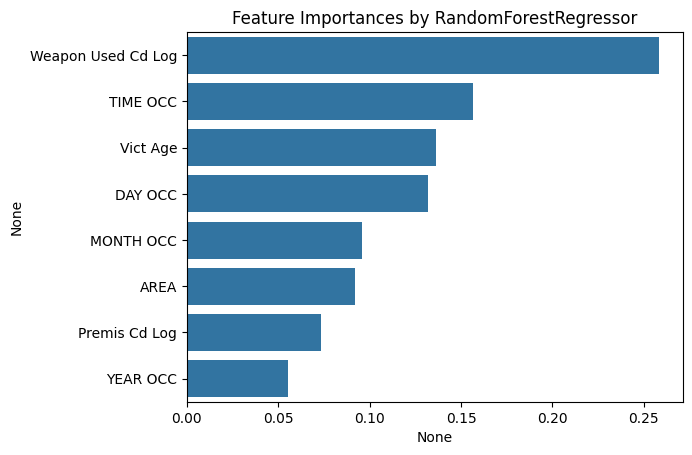

In [ ]:
# Plot 'feature importances'
rf_reg.fit(train_features, train_label)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=train_features.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)
plt.title('Feature Importances by RandomForestRegressor')

Feature importance measures how much each feature contributes to the model's predictions.

Higher importance means the feature has a stronger impact on the target variable.

### **Note:**

"Weapon Used Cd Log" is the most important feature.

It contributes the most to the model's predictions.

"TIME OCC", "Vict Age", and "DAY OCC" are also highly important.

These indicate that time of occurrence, victim's age, and the day of occurrence play key roles in the prediction.

"YEAR OCC" has the least importance.

This suggests that the year of occurrence is not very useful for predicting the target variable.

List of AREA unique values : 
 [ 1 12  2  9  8  7  5  3  6 11  4 10 13 18 20 15 17 14 16 19 21]
List of AREA NAME unique values : 
 ['Central' '77th Street' 'Rampart' 'Van Nuys' 'West LA' 'Wilshire'
 'Harbor' 'Southwest' 'Hollywood' 'Northeast' 'Hollenbeck' 'West Valley'
 'Newton' 'Southeast' 'Olympic' 'N Hollywood' 'Devonshire' 'Pacific'
 'Foothill' 'Mission' 'Topanga']


[ANSWER]
The mostly affected community : 77th Street


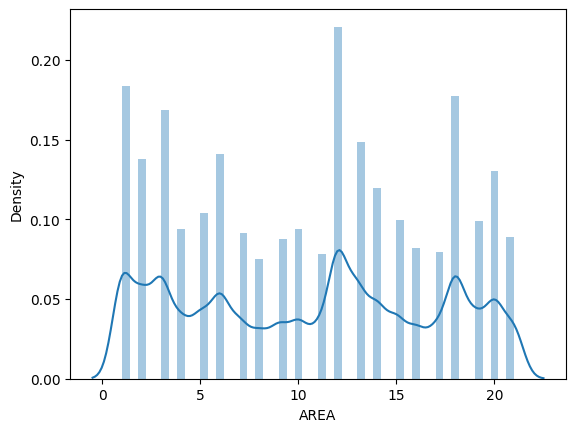

In [ ]:
# Which community mostly get effected my crime?
sns.distplot(crimes['AREA'])
print("List of AREA unique values : \n", crimes['AREA'].unique())
print("List of AREA NAME unique values : \n", crimes['AREA NAME'].unique())
print("\n")
print("[ANSWER]")
print("The mostly affected community : 77th Street")

### **Note :**

Some areas have higher densities, meaning they occur more frequently.

The KDE curve helps visualize the underlying distribution shape without relying solely on the bars.

There are peaks in the KDE curve, indicating concentrated occurrences in certain areas.



[Answer]
People of 30s were most affected to crimes
People of about 70s were less affted to crimes


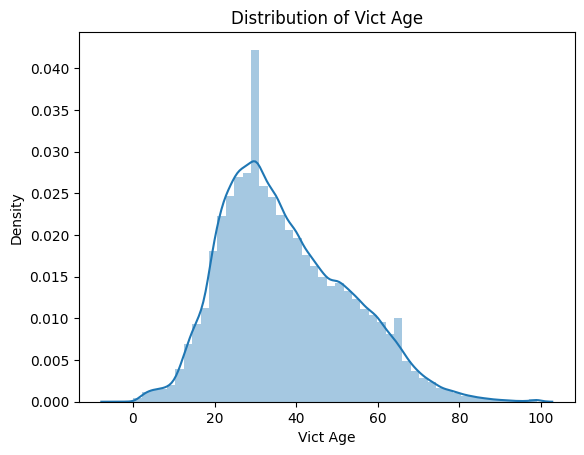

In [ ]:
# Which Age of people are most and least affected?
sns.distplot(crimes['Vict Age'])
plt.title('Distribution of Vict Age')
print("[Answer]")
print("People of 30s were most affected to crimes")
print("People of about 70s were less affted to crimes")

### **Note:**

The distribution appears right-skewed, meaning there are more younger victims than older ones.

There is a peak around age 30, indicating that most victims are around this age.
The frequency gradually decreases as age increases.

A small number of cases involve victims over 70+ years old.


Helps in understanding which age groups are most affected.

Can be used to tailor crime prevention or intervention programs for high-risk age groups.

If needed, further analysis can compare victim age distribution across different crime types.

# **Conclusion:** 🚔👮

• The study successfully identified key crime patterns and predictive factors,
highlighting the importance of time, location, and weapon usage in crime forecasting.

• Machine learning models, especially Gradient Boosting, demonstrated strong
performance in predicting crime trends, making them viable for future crime prevention strategies.

• Policy recommendations could include increased law enforcement presence in
 high-crime areas, targeted interventions for young adults, and enhanced monitoring of peak crime hours.